[https://www.kaggle.com/competitions/digit-recognizer/data?select=sample_submission.csv]

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
sns.set(style='white', context='notebook', palette="hls")
# sns.color_palette("hls", 8)

In [41]:
train = pd.read_csv("train.csv")
target = "label"
features = train.columns[train.columns != target]

In [42]:
x_train = train[features]
y_train = train[target]
del train 

y_train.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

/tmp/ipykernel_337747/563962283.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="hls")


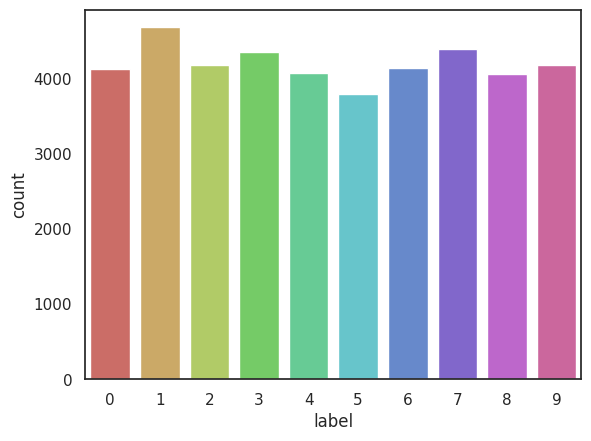

In [43]:
sns.countplot(x=y_train, palette="hls")
plt.show()

In [44]:
x_train.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [45]:
y_train.isna().any()

False

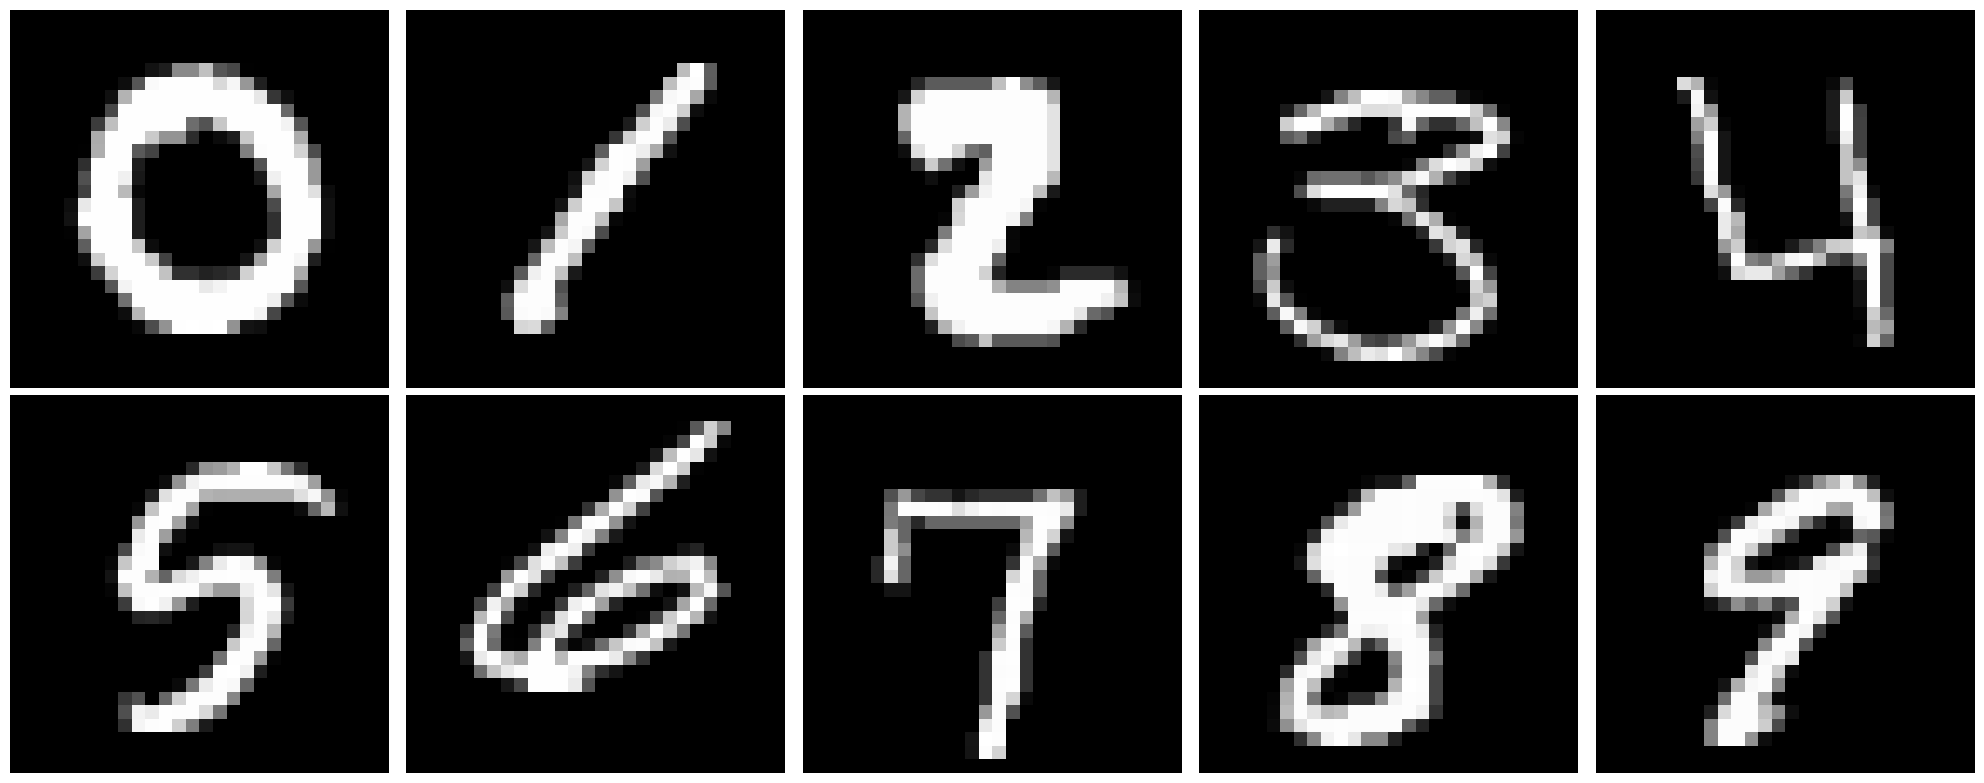

In [46]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train.iloc[index].values.reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()
    

In [47]:
mas = MaxAbsScaler()
x_train = mas.fit_transform(x_train)

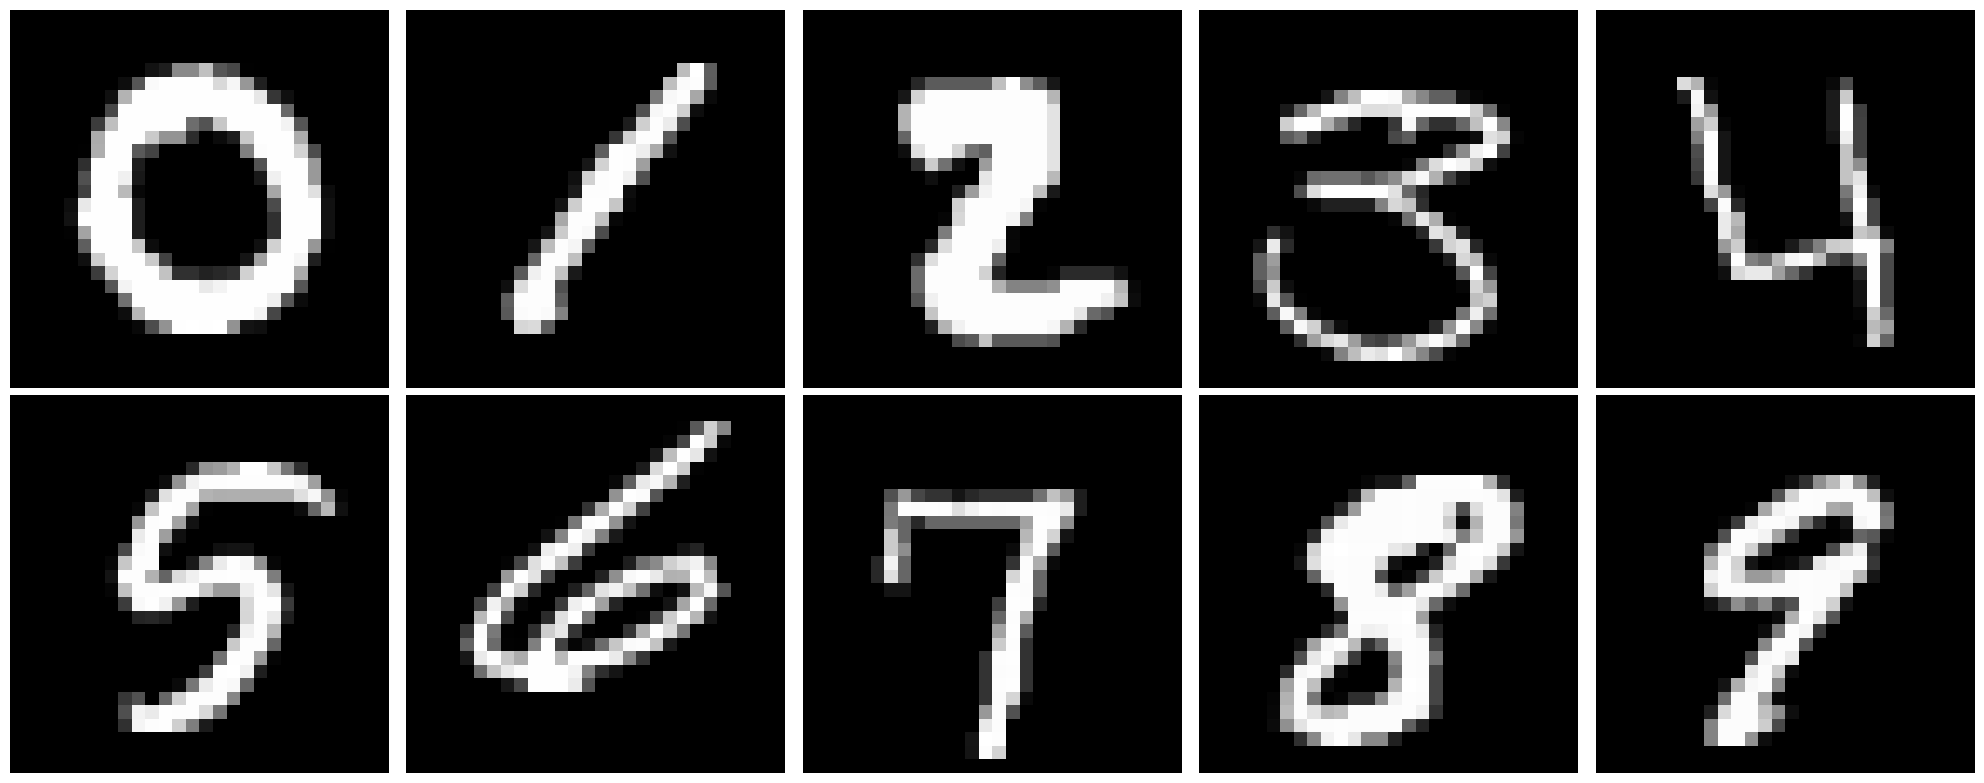

In [48]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train[index].reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()

In [49]:
y_train = to_categorical(y_train, num_classes=10)

In [50]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

Text(0.5, 1.0, 'Validation')

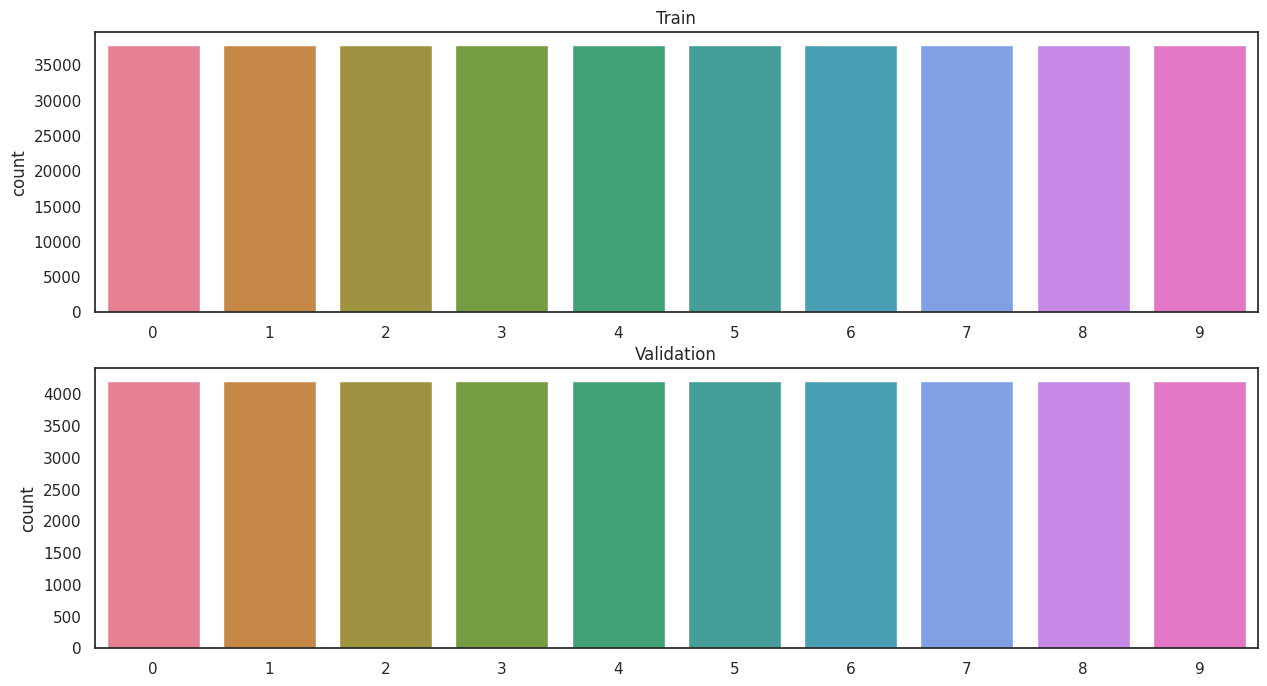

In [51]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
ax = ax.flatten()
sns.countplot(y_train, ax=ax[0])
ax[0].set_title("Train")
sns.countplot(y_val, ax=ax[1])
ax[1].set_title("Validation")

In [57]:
model = Sequential([
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer to transition from convolutional to dense layers
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])

In [58]:
log = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30


ValueError: in user code:

    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/talocha/PyTorch/Data Science/.venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)


In [ ]:
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.plot(logs.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()